In [15]:
import optuna 


def save_study_to_csv(study, filename):
    # Get all trials and filter out the failed ones
    df = study.trials_dataframe()

    df = df[df['state'] != 'FAIL']
    
    df['params_lambda_l1'] = df['params_lambda_l1'].fillna(0.0)

    df.to_csv(filename, index=False)


study_cifar10 = optuna.load_study(study_name='CIFAR10', storage='sqlite:///cnn_hyperparameter_tuning.db')
study_minist_03 = optuna.load_study(study_name='fashion_mnist_0_3_with_t_matrix', storage='sqlite:///cnn_hyperparameter_tuning.db')
study_minist_06 = optuna.load_study(study_name='fashion_mnist_0_6_with_t_matrix', storage='sqlite:///cnn_hyperparameter_tuning.db')

save_study_to_csv(study_cifar10, 'results/cifar10_with_t_matrix.csv')
save_study_to_csv(study_minist_03, 'results/fashion_mnist_0_3_with_t_matrix.csv')
save_study_to_csv(study_minist_06, 'results/fashion_mnist_0_6_with_t_matrix.csv')

In [39]:
import optuna
import optuna.visualization as vis
import matplotlib.pyplot as plt

# Assuming you have a study object called study_cifar10
fig_cifar = vis.plot_optimization_history(study_cifar10)
fig_minist_03 = vis.plot_optimization_history(study_minist_03)
fig_minist_06 = vis.plot_optimization_history(study_minist_06)

fig_cifar.update_yaxes(title_text="Accuracy")  # Overwrite the y-axis label
fig_minist_03.update_yaxes(title_text="Accuracy")  # Overwrite the y-axis label
fig_minist_06.update_yaxes(title_text="Accuracy")  # Overwrite the y-axis label
# update the header of the plot
fig_minist_03.update_layout(title_text="Fashion MNIST 0-3 Optimization History")  # Overwrite the plot title
fig_minist_06.update_layout(title_text="Fashion MNIST 0-6 Optimization History")  # Overwrite the plot title
fig_cifar.update_layout(title_text="CIFAR10 Optimization History")  # Overwrite the plot title

fig_minist_03.show()
fig_cifar.show()
fig_minist_06.show()



study_cifar10 = optuna.load_study(study_name='CIFAR10', storage='sqlite:///cnn_hyperparameter_tuning.db')
study_minist_03 = optuna.load_study(study_name='fashion_mnist_0_3_with_t_matrix', storage='sqlite:///cnn_hyperparameter_tuning.db')
study_minist_06 = optuna.load_study(study_name='fashion_mnist_0_6_with_t_matrix', storage='sqlite:///cnn_hyperparameter_tuning.db')


In [45]:
from optuna.importance import get_param_importances
import optuna.visualization as vis

fig_minist_06 = vis.plot_param_importances(study=study_minist_06, target=lambda t: t.user_attrs['std_accuracy'], target_name='std_accuracy')
fig_minist_06.update_layout(title_text="Fashion MNIST 0-6 Parameter Importances (std_accuracy)")
fig_minist_06.show()

fig_minist_03 = vis.plot_param_importances(study=study_minist_03, target=lambda t: t.user_attrs['std_accuracy'], target_name='std_accuracy')
fig_minist_03.update_layout(title_text="Fashion MNIST 0-3 Parameter Importances (std_accuracy)")
fig_minist_03.show()

fig_cifar = vis.plot_param_importances(study=study_cifar10, target=lambda t: t.user_attrs['std_accuracy'], target_name='std_accuracy')
fig_cifar.update_layout(title_text="CIFAR10 Parameter Importances (std_accuracy)")
fig_cifar.show()


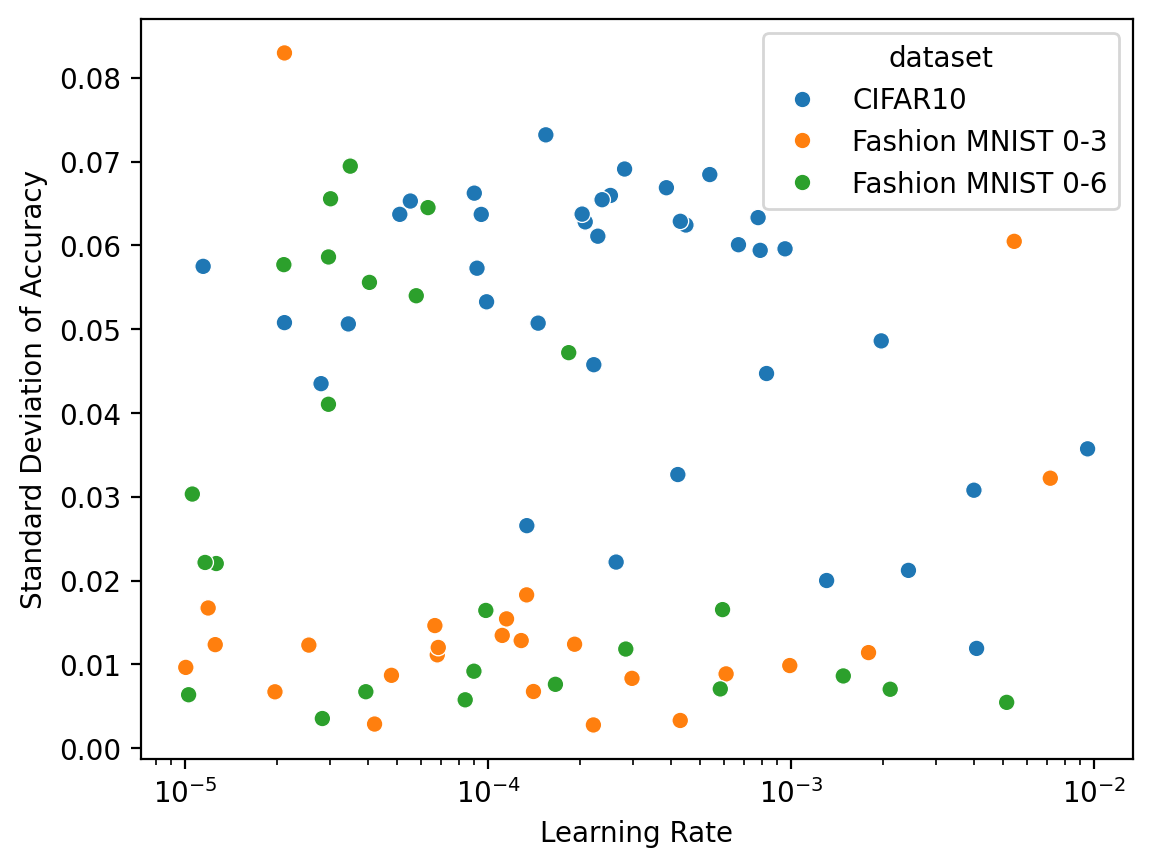

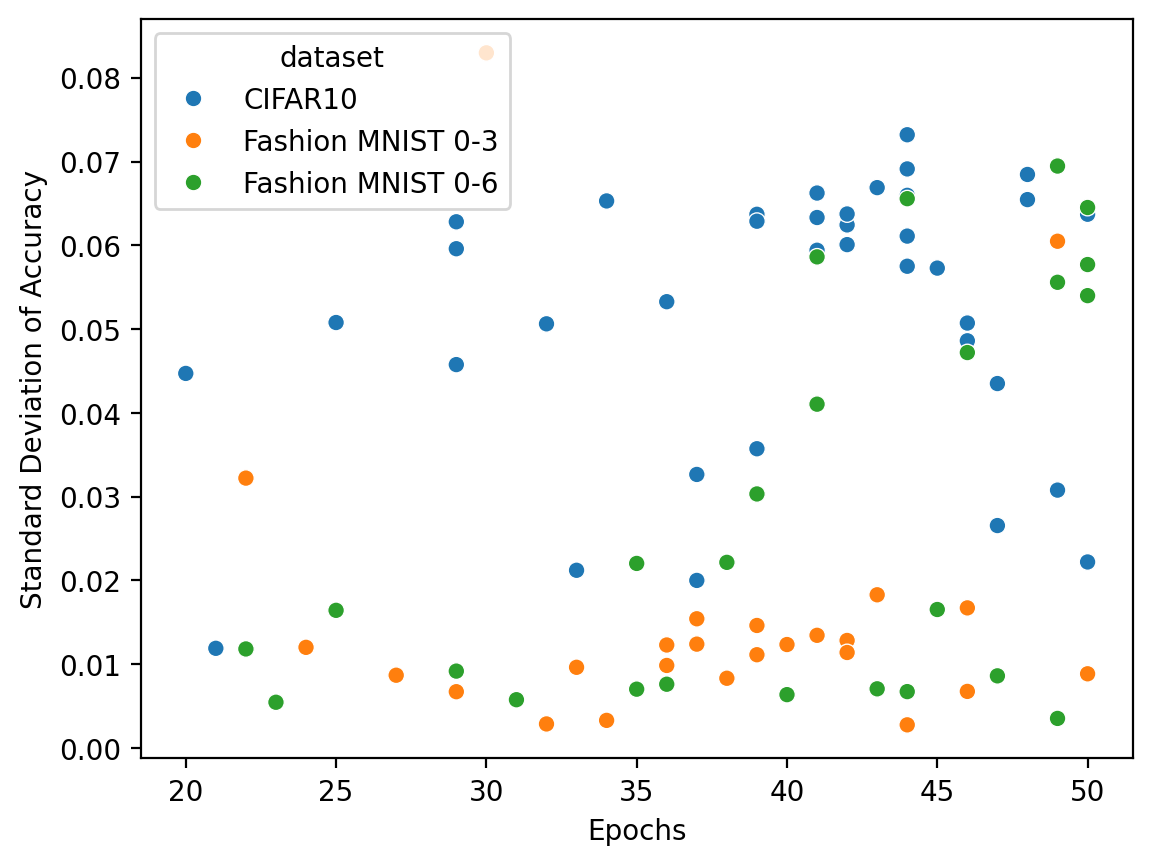

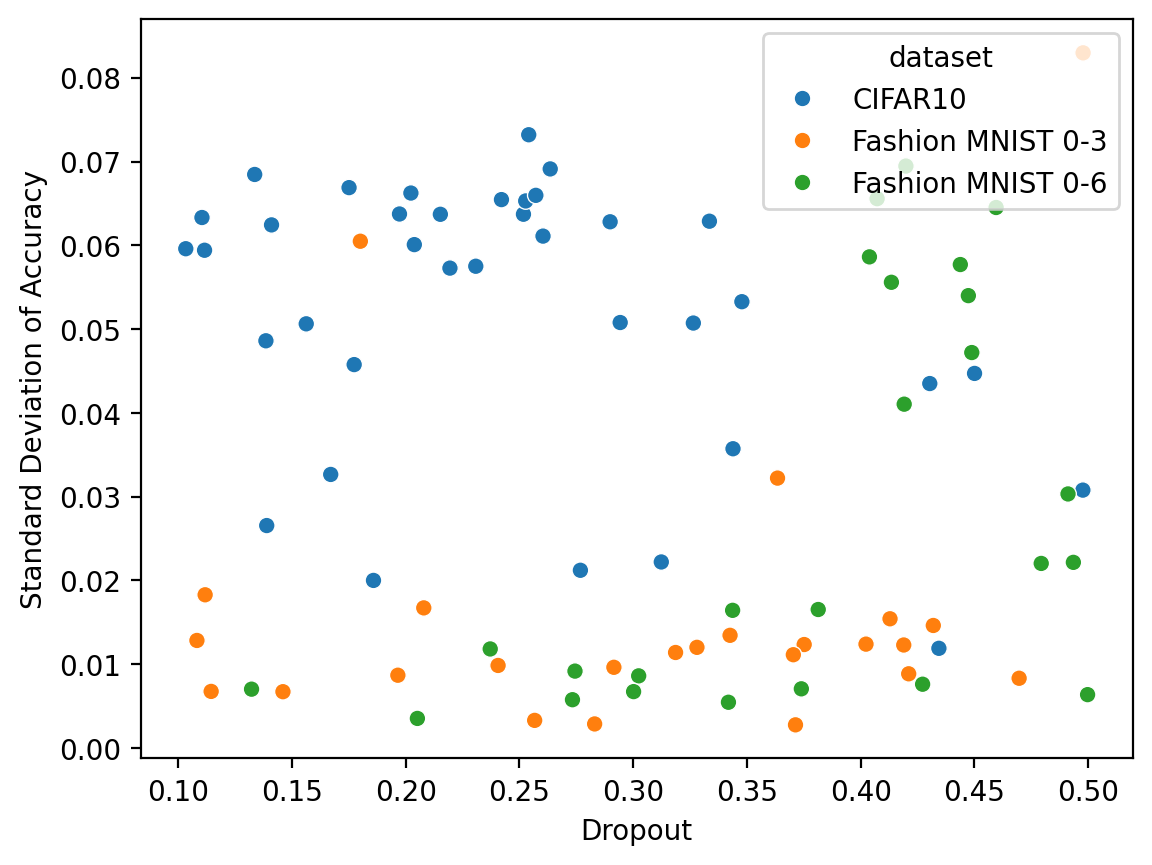

In [57]:
## analyse the datapoints from the dataset 
# for dropout, epochs # in Minst 06 
# learning rate, dropuout in Minst 03
# learning rate CIFAR10 
# USED THE PARAM WHICH ARE ABOVE 20% IMPORTANCE
"""learning rate, epochs, dropout"""
import pandas as pd

df_cifar = pd.read_csv('results/cifar10_with_t_matrix.csv')
df_minist_03 = pd.read_csv('results/fashion_mnist_0_3_with_t_matrix.csv')
df_minist_06 = pd.read_csv('results/fashion_mnist_0_6_with_t_matrix.csv')

# compine the dataset and add a column for the dataset name
df_cifar['dataset'] = 'CIFAR10'
df_minist_03['dataset'] = 'Fashion MNIST 0-3'
df_minist_06['dataset'] = 'Fashion MNIST 0-6'

df = pd.concat([df_cifar, df_minist_03, df_minist_06])

# plot the learning rate vs the user_attrs_std_accuracy in on plot labeled by the dataset
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=200)
sns.scatterplot(data=df, x='params_lr', y='user_attrs_std_accuracy', hue='dataset')
plt.xlabel('Learning Rate')
plt.ylabel('Standard Deviation of Accuracy')
# x in log scale
plt.xscale('log')
# increase resolution
plt.show()


plt.figure(dpi=200)
sns.scatterplot(data=df, x='params_epochs', y='user_attrs_std_accuracy', hue='dataset')
plt.xlabel('Epochs')
plt.ylabel('Standard Deviation of Accuracy')
plt.show()

plt.figure(dpi=200)
sns.scatterplot(data=df, x='params_dropout', y='user_attrs_std_accuracy', hue='dataset')
plt.xlabel('Dropout')
plt.ylabel('Standard Deviation of Accuracy')
plt.show()





In [46]:
from optuna.importance import get_param_importances
import optuna.visualization as vis

fig_minist_06 = vis.plot_param_importances(study=study_minist_06)
fig_minist_06.update_layout(title_text="Fashion MNIST 0-6 Parameter Importances (accuracy)")
fig_minist_06.show()

fig_minist_03 = vis.plot_param_importances(study=study_minist_03)
fig_minist_03.update_layout(title_text="Fashion MNIST 0-3 Parameter Importances (accuracy)")
fig_minist_03.show()

fig_cifar = vis.plot_param_importances(study=study_cifar10)
fig_cifar.update_layout(title_text="CIFAR10 Parameter Importances (accuracy)")
fig_cifar.show()

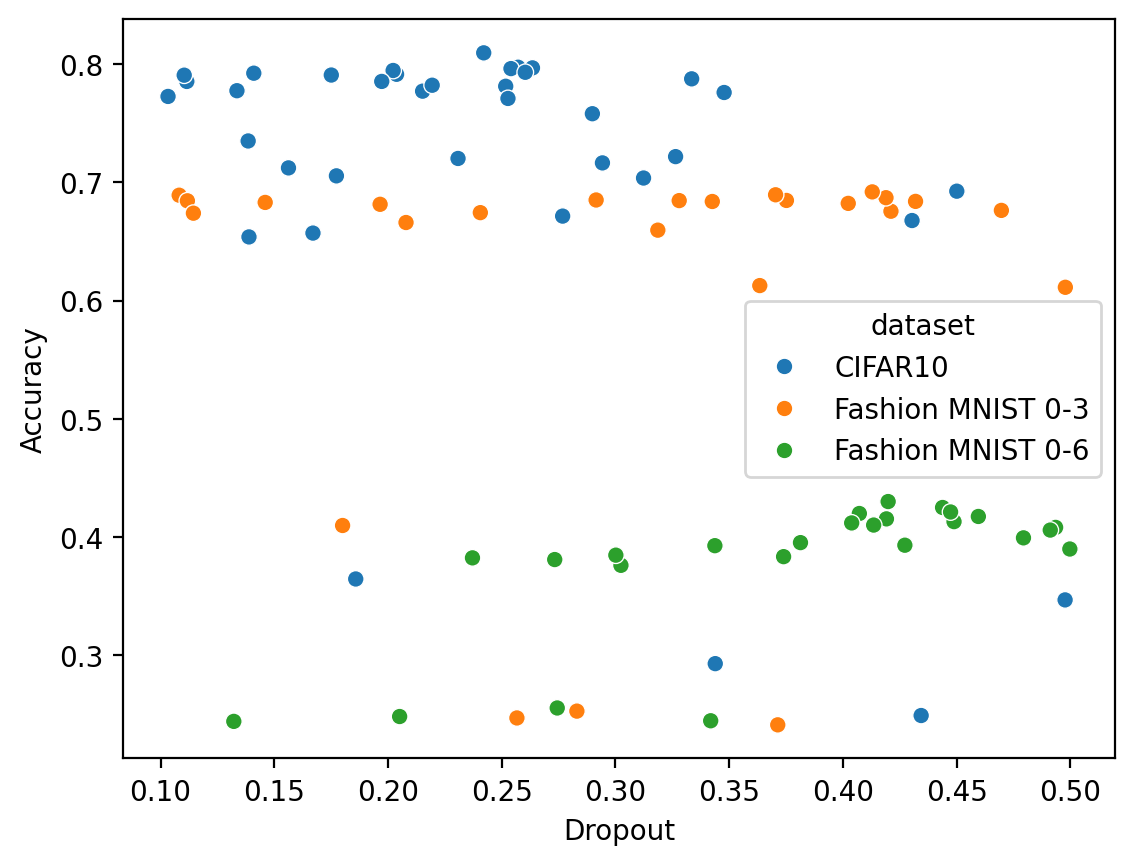

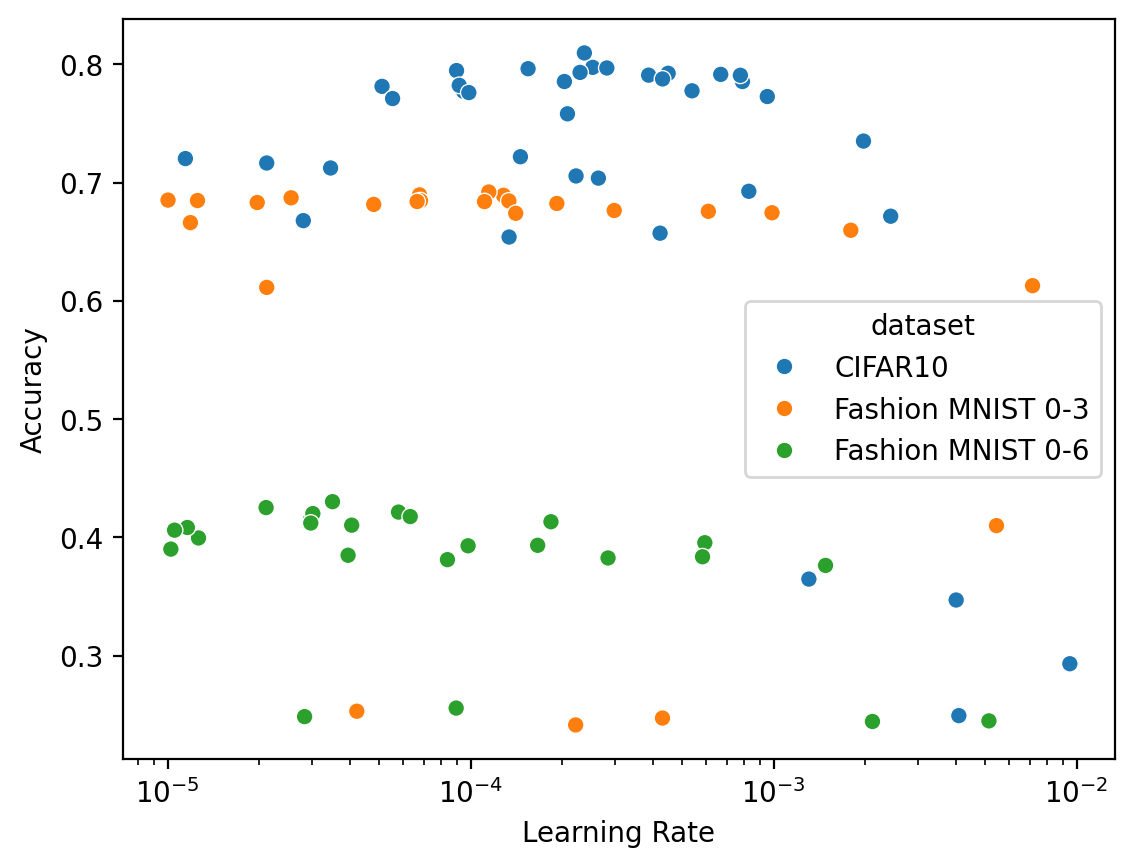

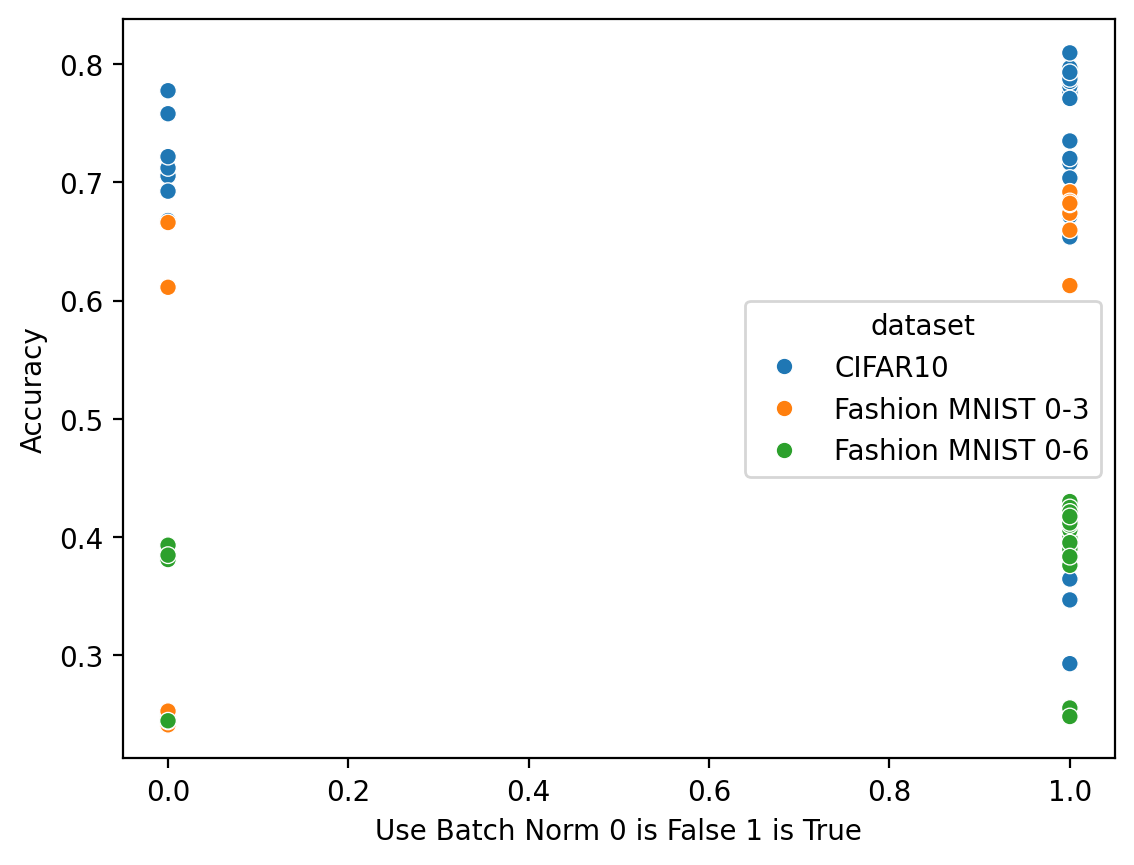

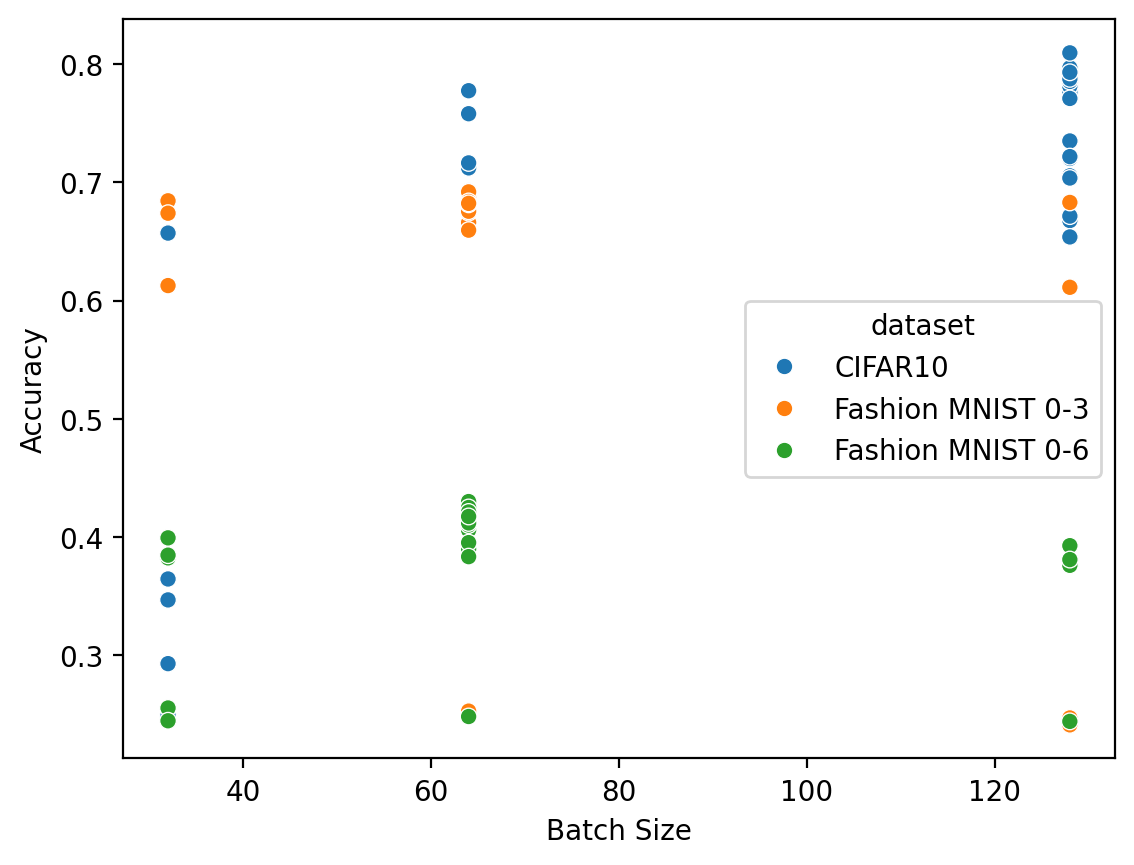

In [63]:
# plot the learning rate vs the user_attrs_std_accuracy in on plot labeled by the dataset
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=200)
sns.scatterplot(data=df, x='params_dropout', y='user_attrs_mean_accuracy', hue='dataset')
plt.xlabel('Dropout')
plt.ylabel('Accuracy')
plt.show()


plt.figure(dpi=200)
sns.scatterplot(data=df, x='params_lr', y='user_attrs_mean_accuracy', hue='dataset')
plt.xlabel('Learning Rate')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()

plt.figure(dpi=200)
sns.scatterplot(data=df, x='params_use_batch_norm', y='user_attrs_mean_accuracy', hue='dataset')
plt.xlabel('Use Batch Norm 0 is False 1 is True')   
plt.ylabel('Accuracy')
plt.show()



plt.figure(dpi=200)
sns.scatterplot(data=df, x='params_batch_size', y='user_attrs_mean_accuracy', hue='dataset')
plt.xlabel('Batch Size')    
plt.ylabel('Accuracy')
plt.show()